In [1]:
import json
import numpy as np
from matplotlib.pyplot import plot,show, legend, figure,title
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import re
import MeCab
%matplotlib inline

In [2]:
CATEGORY=["world","economy","entertainment","sports","IT","science"]
LABEL=["wrong","correct"]
seq_len=13

In [3]:
def Wakati(text):
    m = MeCab.Tagger ("-Ochasen -d /usr/lib/mecab/dic/mecab-ipadic-neologd -Owakati")
    result=m.parse(text)
    ws = re.compile(" ")
    words = [word for word in ws.split(result)]
    if words[-1] == u"\n":
        words = words[:-1]
    return [word for word in words if word!="「" and word!="」" and word!="、"]

In [4]:
def classify_categories(data_list):
    categories=[[] for _ in range(len(CATEGORY))]
    for dic in data_list:
        categories[dic["category_num"]].append(dic)
    return categories

In [5]:
def classify_correct(categories):
    data=[]
    for category in categories:
        L=[[],[]]
        for dic in category:
            if dic["correct"]==0:
                L[0].append(dic)
            else:
                L[1].append(dic)
        data.append(L)
    return data

In [7]:
def getCrossTable(filename):
    table=np.zeros((6,6))
    with open(filename, 'r') as f:
        data = json.load(f)["result"]
    data=classify_categories(data)
    for i in range(len(data)):
        for j in range(len(data[i])):
            table[i][int(data[i][j]["output_category_num"])]+=1
        table[i]/=sum(table[i])
    return table

In [9]:
table=getCrossTable("../result/yahoo.json")
print(table)

[[0.84615385 0.03988604 0.01709402 0.03276353 0.02991453 0.03418803]
 [0.02008608 0.81420373 0.01936872 0.02008608 0.07604017 0.05021521]
 [0.02222222 0.02508961 0.82508961 0.07455197 0.0344086  0.01863799]
 [0.00858369 0.01072961 0.02002861 0.94277539 0.009299   0.00858369]
 [0.02246377 0.06956522 0.01956522 0.01594203 0.85362319 0.01884058]
 [0.04271709 0.03011204 0.00840336 0.01470588 0.02521008 0.87885154]]


In [6]:
def xyzList_categories(category):
    x=[]
    y=[]
    z=[]
    L=category[0]+category[1]
    for dic in L:
        x.append(dic["pca_result"][0])
        y.append(dic["pca_result"][1])
        z.append(dic["pca_result"][2])
    return x,y,z

In [7]:
def xyzList_correct(dicts):
    x=[]
    y=[]
    z=[]
    for dic in dicts:
        x.append(dic["pca_result"][0])
        y.append(dic["pca_result"][1])
        z.append(dic["pca_result"][2])
    return x,y,z

In [8]:
def plot_correct(data):
    for i in range(len(CATEGORY)):
        fig = figure()
        ax = fig.add_subplot(111,projection='3d')
        x_0,y_0,z_0=xyzList_correct(data[i][0])
        x_1,y_1,z_1=xyzList_correct(data[i][1])
        ax.scatter3D(x_0, y_0,z_0, c="red", label="wrong",s=1)
        ax.scatter3D(x_1,y_1,z_1,c="green",label="correct",s=1)
        ax.legend(loc="upper right")
        title(CATEGORY[i])
        show()
        fig.savefig("news_"+CATEGORY[i]+".png")

In [9]:
def getAccuracy(data):
    print("-------------------------")
    for i in range(len(data)):
        print(CATEGORY[i]+":"+str(getCategoryAccuracy(data[i]))+"%")
    print("-------------------------")

In [10]:
def plot_categories(data):
    colorlist = ["r", "g", "b", "c", "m", "k"]
    fig = figure()
    ax = fig.add_subplot(111,projection='3d', azim=45,elev=-5)

    for i in range(6):
        x,y,z=xyzList_categories(data[i])
        ax.scatter3D(x, y, z , color=colorlist[i], label=CATEGORY[i],s=1)
        ax.legend(bbox_to_anchor=(1.05,0.0), loc="lower left")

    fig.subplots_adjust(right=0.75)
    show()
    fig.savefig("news_encoded.png")

In [11]:
def getCategoryAccuracy(category):
    wrongs=len(category[0])
    corrects=len(category[1])
    if wrongs+corrects==0:
        return "-"
    else:
        return corrects/(wrongs+corrects)*100

In [12]:
def load_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)["result"]
    data=classify_categories(data)
    return classify_correct(data)

In [13]:
def visualize_attention(data,num):
    for i in range(len(CATEGORY)):
        for j in range(len(LABEL)):
            print("【{} {}】".format(CATEGORY[i],LABEL[j]))
            for k in range(num):
                attention=data[i][j][k]["attention"]
                title=data[i][j][k]["title"]
                words=Wakati(title)+["EOS"]*(seq_len-len(Wakati(title)))
                attention=[round(l,2) for l in attention]
                print(words)
                print(attention)
                if j==0:
                    print("予想カテゴリー: {}".format(
                        CATEGORY[data[i][j][k]["output_category_num"]]))
                print("")
    return

In [14]:
yahoo_data=load_file("../result/yahoo.json")
livedoor_data=load_file("../result/livedoor.json")

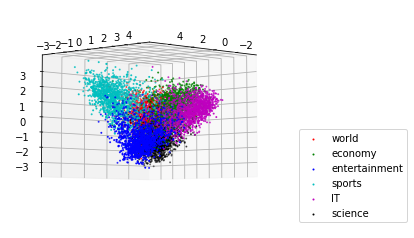

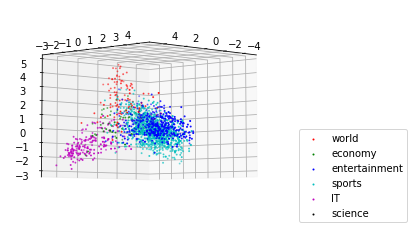

In [15]:
plot_categories(yahoo_data)
plot_categories(livedoor_data)

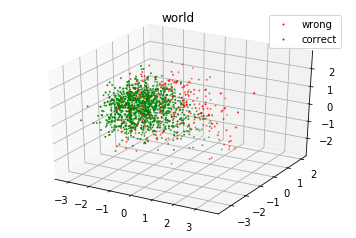

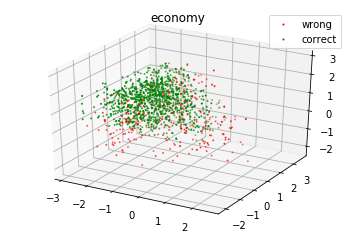

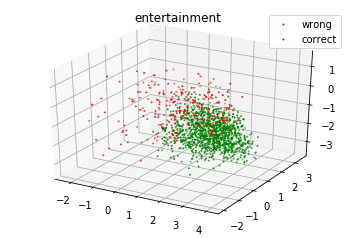

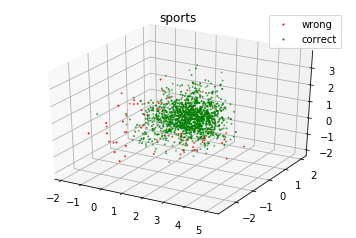

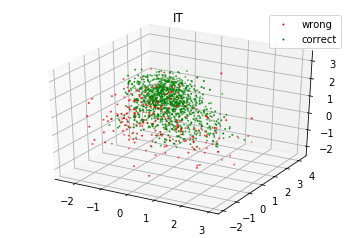

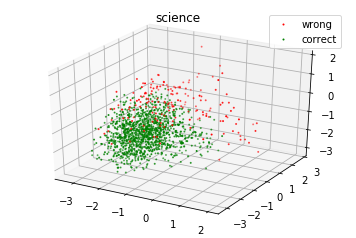

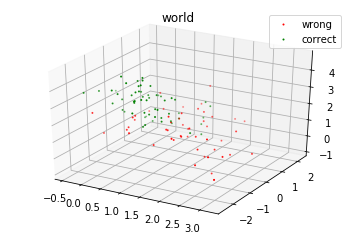

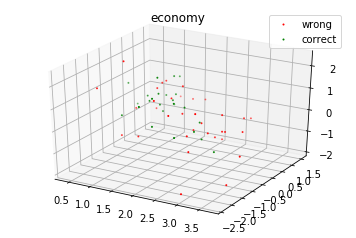

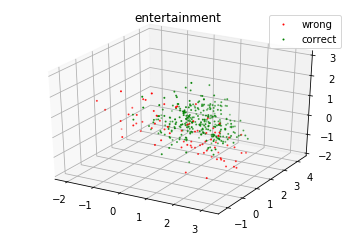

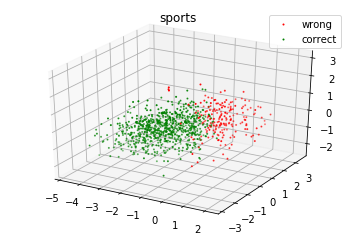

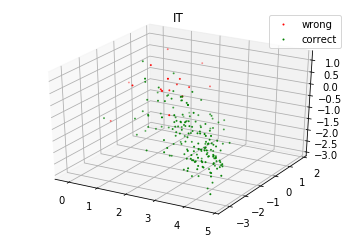

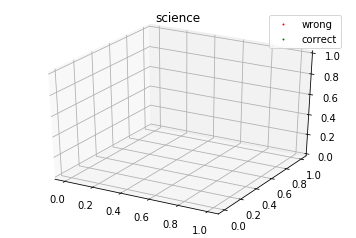

In [16]:
plot_correct(yahoo_data)
plot_correct(livedoor_data)

In [17]:
visualize_attention(yahoo_data,10)

【world wrong】
['一人っ子政策', '廃止', '効果', '疑問', 'も', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS']
[0.31, 0.22, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
予想カテゴリー: economy

['往年', 'の', '日本車', '露', 'で', '華麗', 'に', '競う', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS']
[0.04, 0.05, 0.28, 0.28, 0.04, 0.04, 0.04, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04]
予想カテゴリー: sports

['偽', 'くまモン', '中国当局', 'が', '初', '摘発', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS']
[0.06, 0.23, 0.23, 0.03, 0.03, 0.2, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
予想カテゴリー: IT

['香港デモ', '一部', '解除', '活動', 'は', '継続', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS']
[0.37, 0.05, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
予想カテゴリー: entertainment

['米大統領選', 'に', '第', '三', 'の', '候補', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS']
[0.31, 0.04, 0.04, 0.04, 0.04, 0.21, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
予想カテゴリー: sports

['独', '検察', 'サッカー', '連盟', 'を', '捜索', 'EOS', 'EOS', 'EOS', 'EOS', 'EOS', '

In [18]:
getAccuracy(yahoo_data)
getAccuracy(livedoor_data)

-------------------------
world:84.61538461538461%
economy:81.42037302725969%
entertainment:82.5089605734767%
sports:94.27753934191702%
IT:85.3623188405797%
science:87.88515406162465%
-------------------------
-------------------------
world:54.12844036697248%
economy:42.3728813559322%
entertainment:79.6875%
sports:79.20489296636084%
IT:91.83673469387756%
science:-%
-------------------------
